# Assignment 3: Decision Tree and Random Forest {-}

This assignment aims at familiarizing you with training and testing Decision Tree and Random Forest classification model. Here are the BASIC requirements of the assignment:

- Load the data.
- Analyze the data.
- Check if the data is imbalanced, possibly apply SMOTE to oversample or undersample data classes.
- Use GridSearchCV to find the best Decision Tree and Random Forest.
- Show the most important features.
- Visualize the tree.


The dataset you will be working on is 'data-employee-recruitment.csv'. It is composed of attributes such as employee gender, education level, company size, etc., to develop an employee recruitment prediction model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment3 (e.g., ML4DS-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Load Pandas library and load the dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("data-employee-recruitment.csv")

In [2]:
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


A company is looking for potential candidates from a pool of training program attendants. The dataset contains attendant background (demographics, current company, i.e., data features) and whether he or she is looing for a job change (data label). The company wants to build a prediction model using this dataset. Here follows the data dictionary:

* enrollee_id : unique ID for candidate
* city_development_index : developement index of the city (scaled)
* gender: gender of candidate
* relevent_experience: relevant experience of candidate
* enrolled_university: type of university course enrolled if any
* education_level: education level of candidate
* major_discipline: education major discipline of candidate
* experience: candidate's total experience in years
* company_size: number of employees in the current company of candidate
* company_type : Type of current employer
* last_new_job: difference in years between previous job and current job
* training_hours: training hours completed
* target value: 0 – not looking for job change, 1 – looking for a job change

In [3]:
# Rename the columns
df.rename({"relevent_experience":"relevant_experience"},axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2135 non-null   int64  
 1   city_development_index  2135 non-null   float64
 2   gender                  2135 non-null   object 
 3   relevant_experience     2135 non-null   object 
 4   enrolled_university     2135 non-null   object 
 5   education_level         2135 non-null   object 
 6   major_discipline        2135 non-null   object 
 7   experience              2135 non-null   object 
 8   company_size            2135 non-null   object 
 9   company_type            2135 non-null   object 
 10  last_new_job            2135 non-null   object 
 11  training_hours          2135 non-null   int64  
 12  target                  2135 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 217.0+ KB


In [5]:
df.isnull().values.any()

False

In [6]:
df.duplicated().values.any()

False

In [7]:
# Get the values of each categorical feature
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
for col in cat_cols:
    print(col + ":", df[col].unique())

gender: ['Male' 'Female']
relevant_experience: ['Has relevent experience' 'No relevent experience']
enrolled_university: ['Full time course' 'Part time course']
education_level: ['Graduate' 'Masters' 'Phd']
major_discipline: ['STEM' 'Humanities' 'Other' 'No Major' 'Business Degree' 'Arts']
experience: ['2' '9' '4' '<1' '5' '3' '11' '10' '7' '12' '1' '16' '15' '8' '13' '17'
 '>20' '6' '19' '14' '18' '20']
company_size: ['50-99' '100-500' '<10' '10000+' '1000-4999' '10/49' '500-999'
 '5000-9999']
company_type: ['Pvt Ltd' 'Early Stage Startup' 'Funded Startup' 'NGO' 'Public Sector'
 'Other']
last_new_job: ['2' 'never' '1' '4' '3' '>4']


In [8]:
sns.set()

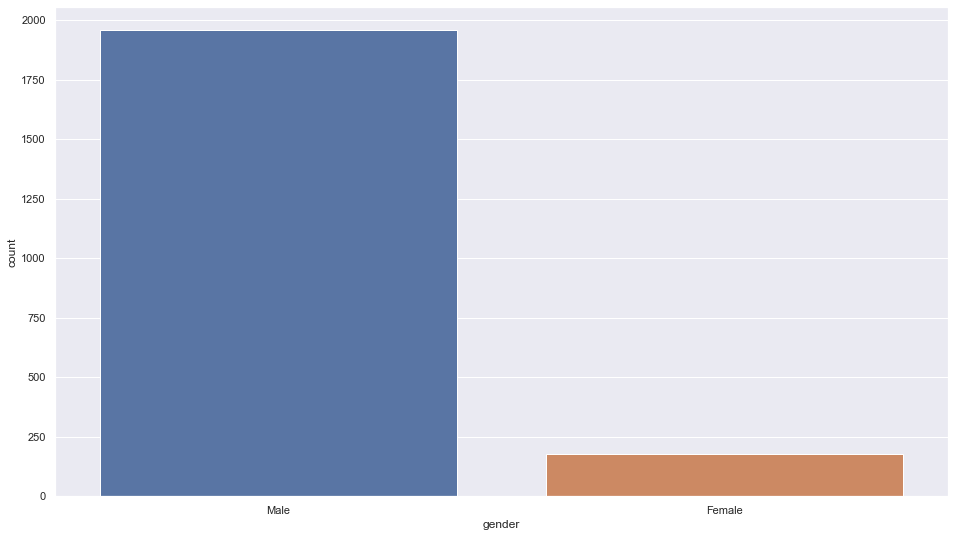

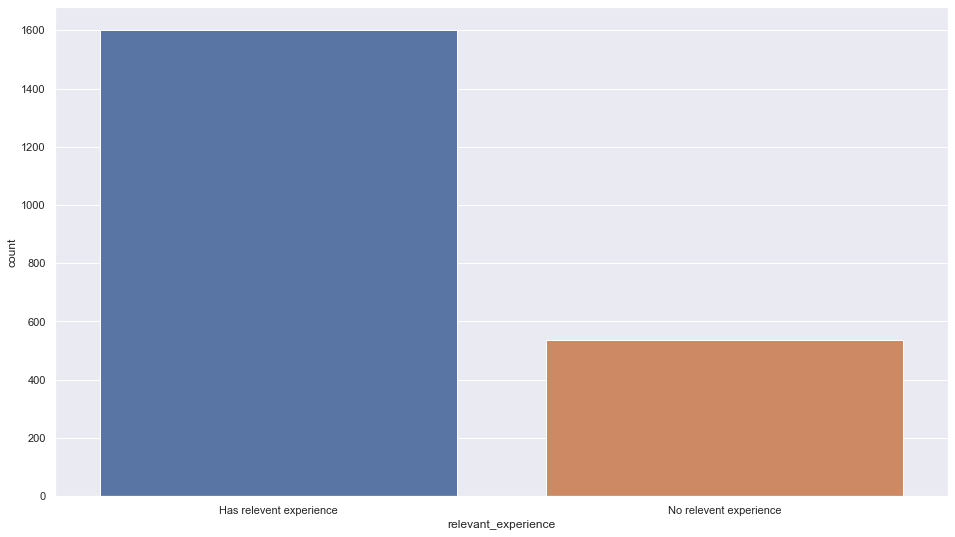

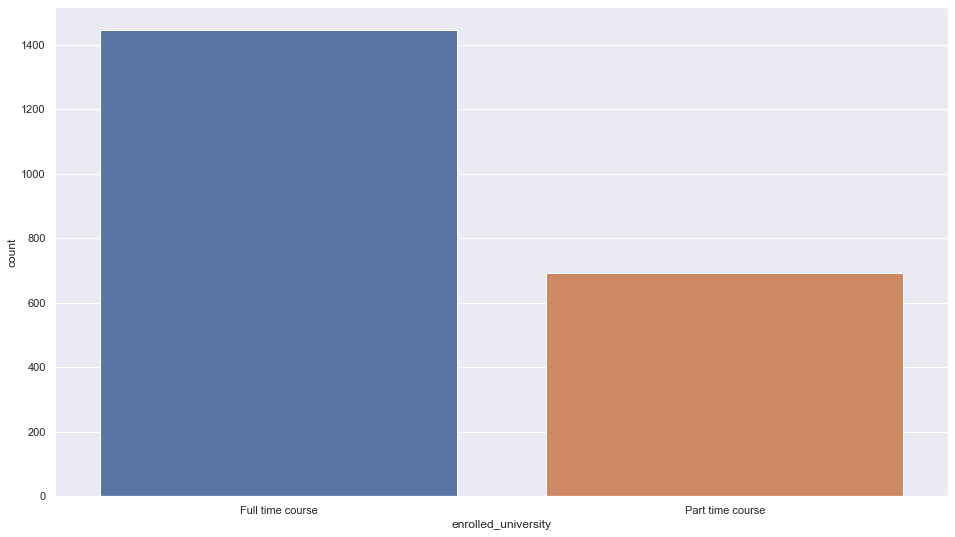

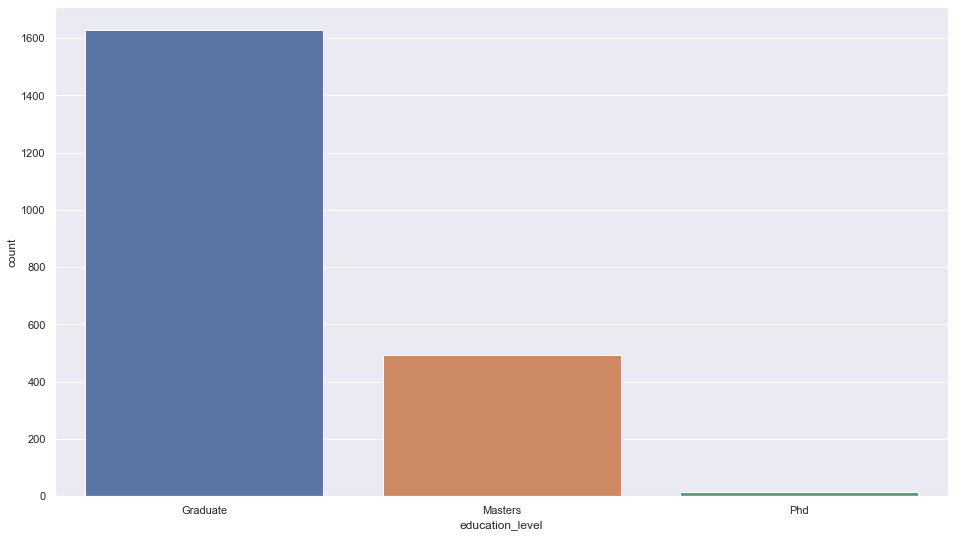

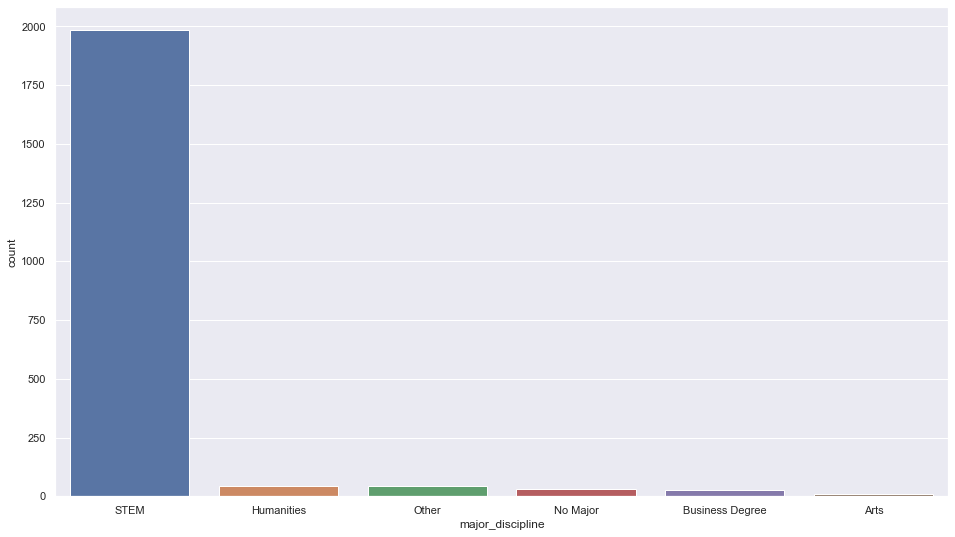

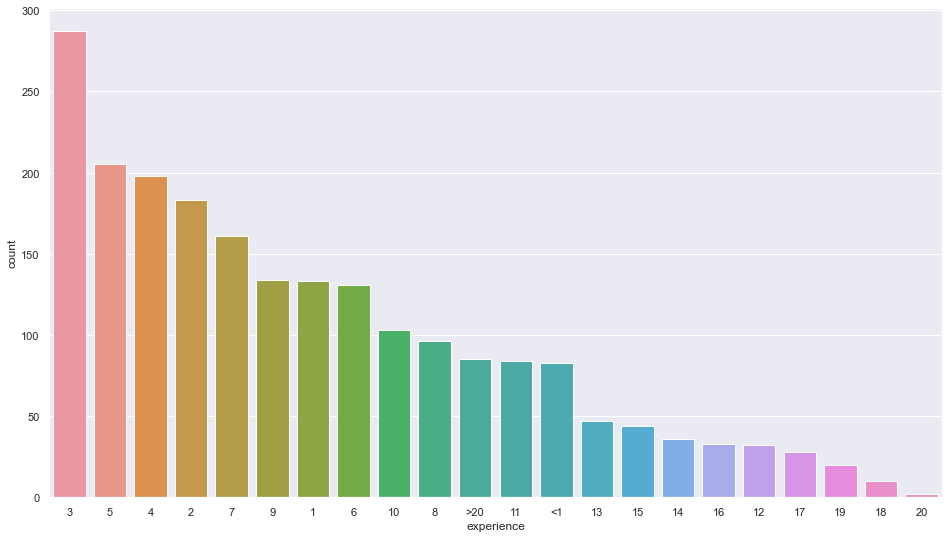

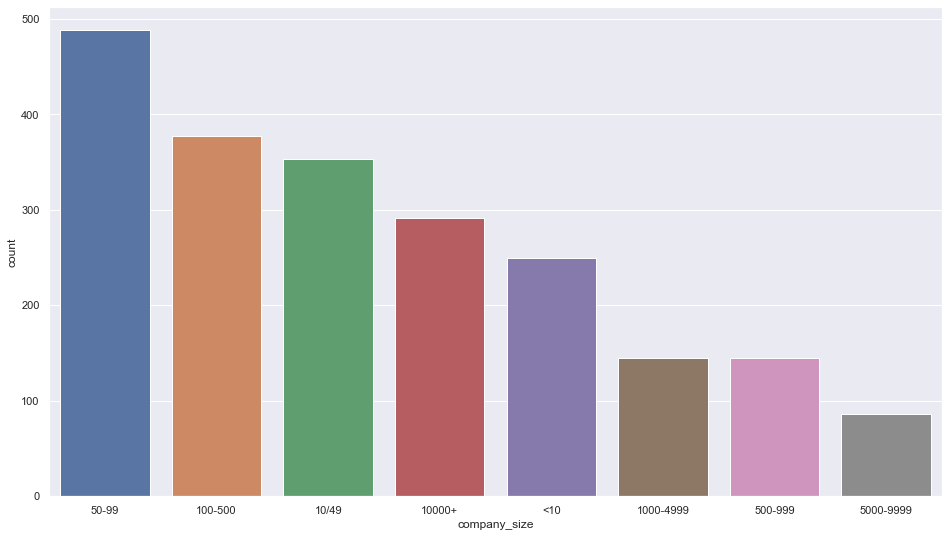

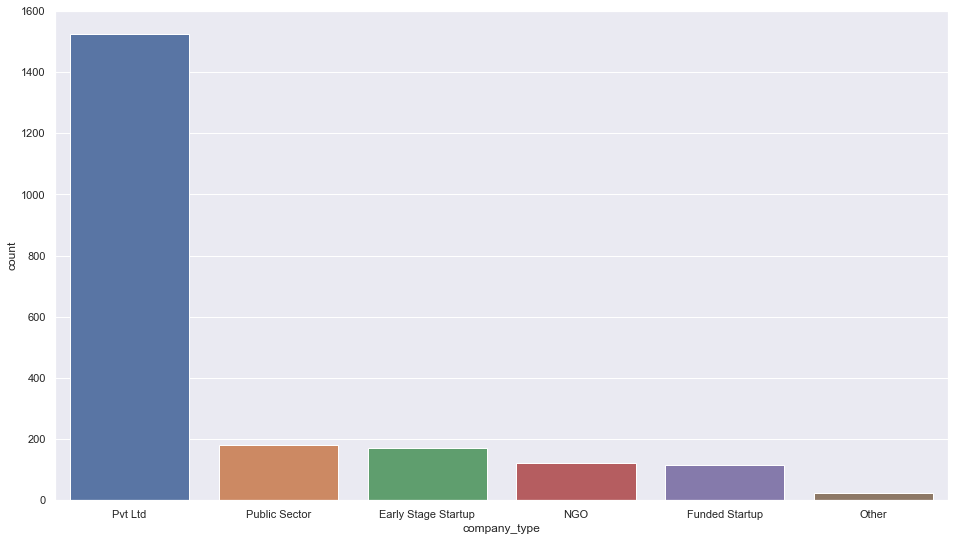

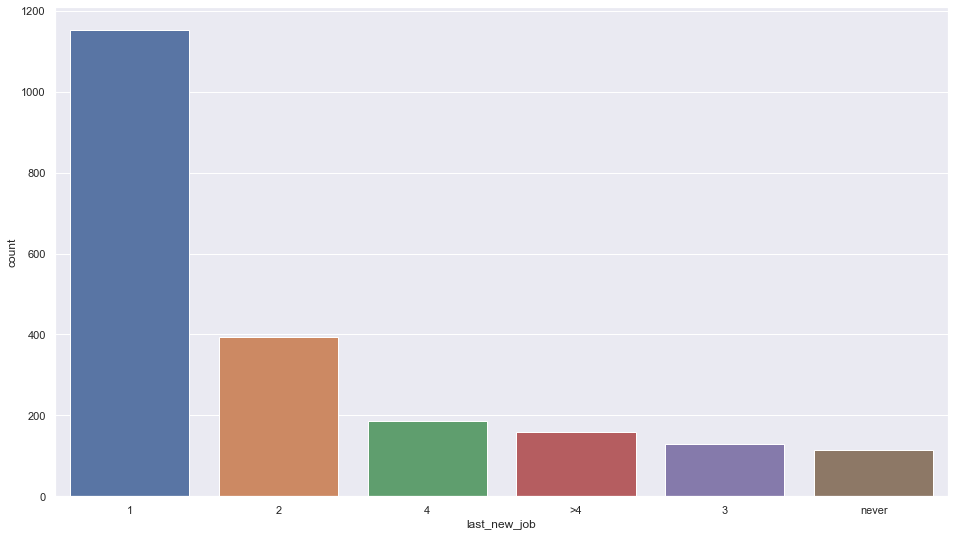

In [9]:
# Visualize the number of data samples in each categorical feature
for col in cat_cols:
    plt.figure(figsize=(16,9))
    sns.countplot(x=col, data = df, order=df[col].value_counts().index)
    plt.show()

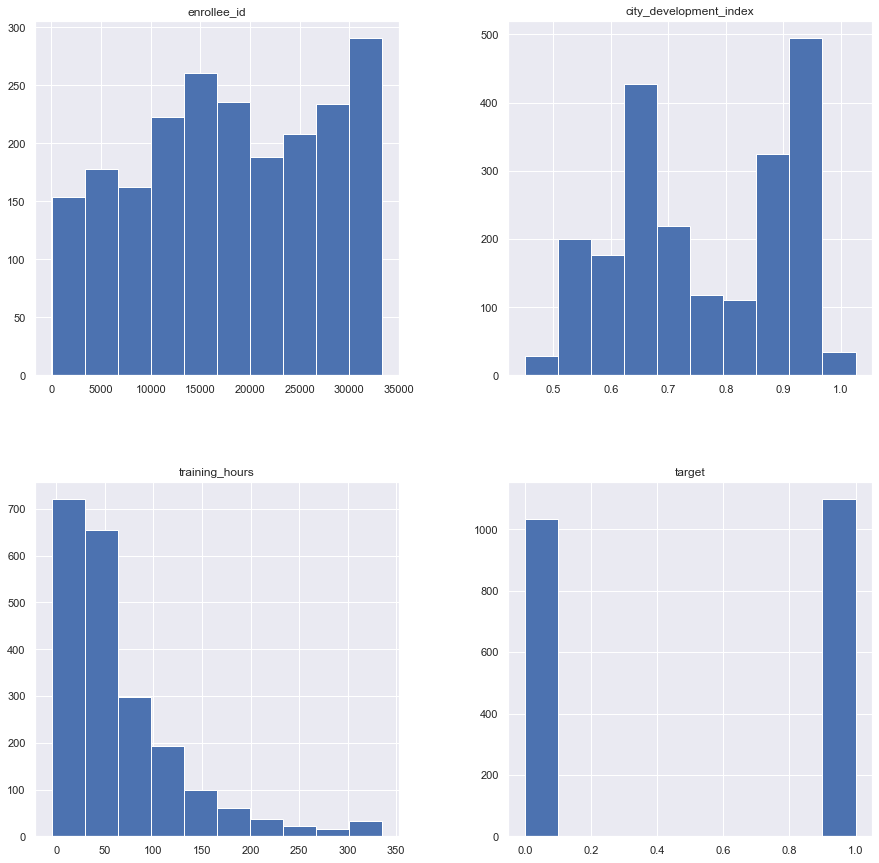

In [10]:
# Target same same nhau => có nhất thiết sử dụng oversampling/undersampling không?
df.hist(figsize=(15,15))
plt.show()

In [11]:
df.drop(columns=["enrollee_id"], inplace=True)

In [12]:
df

,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2130,0.698,Female,No relevent experience,Part time course,Graduate,Other,3,10/49,Funded Startup,1,14,0.0
2131,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,10000+,NGO,1,94,0.0
2132,0.926,Male,Has relevent experience,Full time course,Masters,STEM,19,50-99,Pvt Ltd,4,27,0.0
2133,0.895,Male,Has relevent experience,Part time course,Masters,Other,>20,1000-4999,Pvt Ltd,>4,18,0.0


In [13]:
df = pd.get_dummies(df)
df

,city_development_index,training_hours,target,gender_Female,gender_Male,relevant_experience_Has relevent experience,relevant_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,education_level_Graduate,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.704,71,1.0,0,1,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0.594,217,1.0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.596,12,1.0,0,1,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
3,0.614,20,1.0,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.534,52,1.0,0,1,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,0.698,14,0.0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2131,0.920,94,0.0,0,1,0,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0
2132,0.926,27,0.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2133,0.895,18,0.0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
